/var/folders/gw/hccx75pd68gbqqzt5nz321pw0000gn/T/ipykernel_46864/2326231136.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])


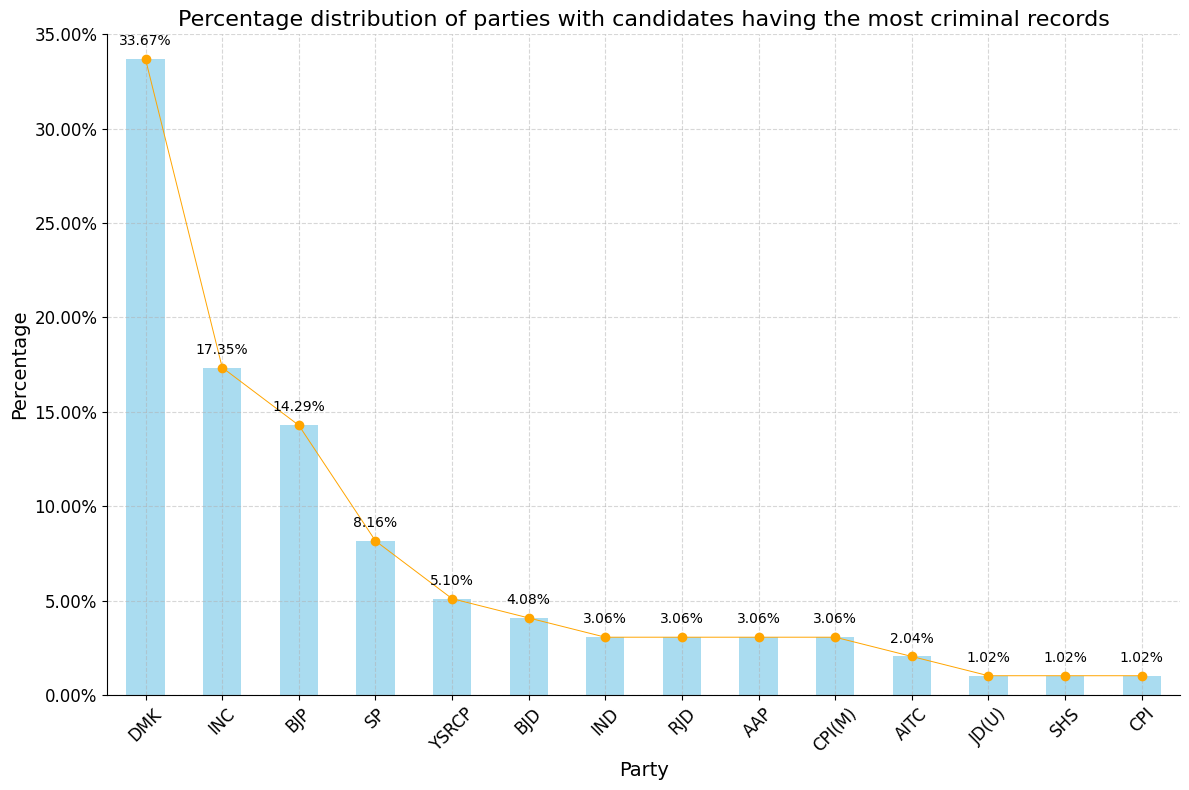

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

data = pd.concat([train_data, test_data], ignore_index=True)

total_criminal_candidates = (data['Criminal Case'] > 10).sum()

party_criminal_counts = data[data['Criminal Case'] > 10]['Party'].value_counts()

percentage_distribution = (party_criminal_counts / total_criminal_candidates) * 100

numeric_index = range(len(percentage_distribution))

plt.figure(figsize=(12, 8))
percentage_distribution.plot(kind='bar', color='skyblue', alpha=0.7)
line_plot = plt.plot(numeric_index, percentage_distribution.values, marker='o', color='orange', linewidth=0.7)

plt.title('Percentage distribution of parties with candidates having the most criminal records', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(numeric_index, percentage_distribution.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])
plt.ylim(0, 35)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
sns.despine()

for i, value in enumerate(percentage_distribution.values):
    plt.annotate('{:.2f}%'.format(value), (numeric_index[i], value),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.show()

/var/folders/gw/hccx75pd68gbqqzt5nz321pw0000gn/T/ipykernel_46864/3120247582.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in range(0, 51, 5)])


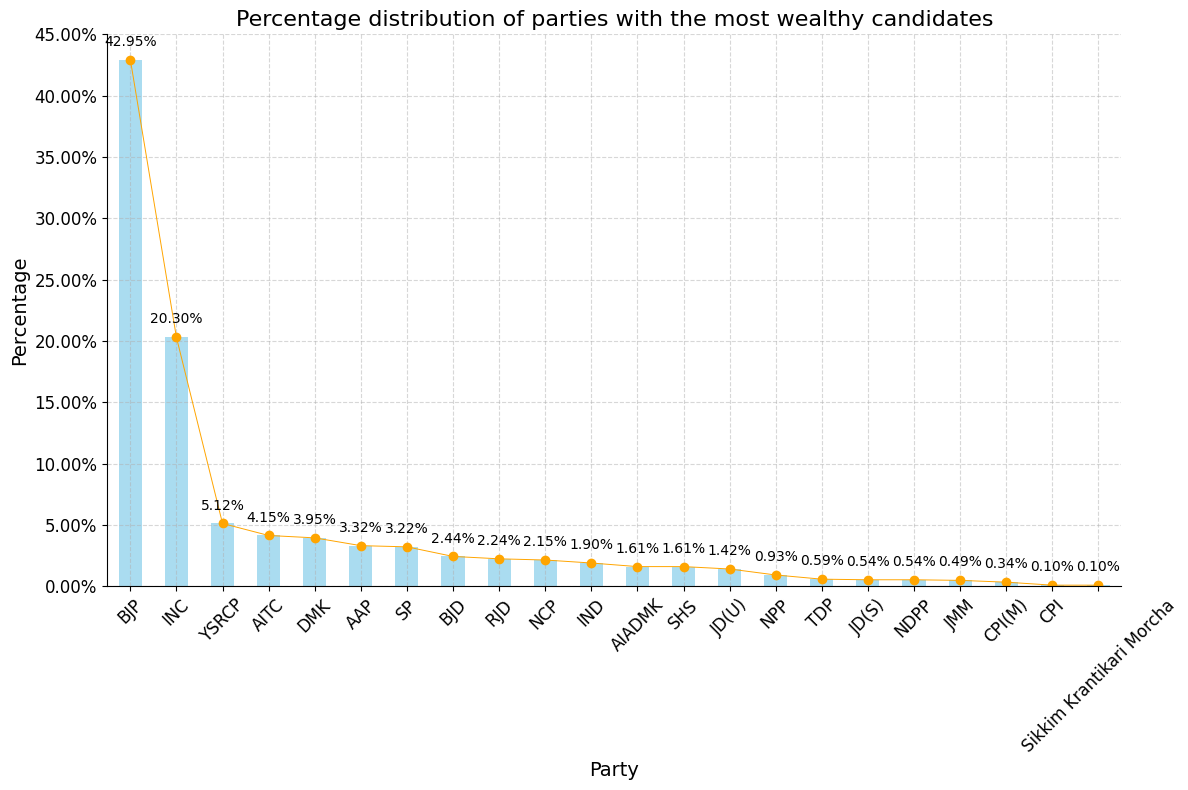

In [54]:
def convert_to_numeric(value):
    if isinstance(value, float):
        return value
    elif value == '0':
        return 0.0
    elif 'Crore' in value:
        return float(value.replace(' Crore+', '')) * 10**7
    elif 'Lac' in value:
        return float(value.replace(' Lac+', '')) * 10**5
    elif 'Thou' in value:
        return float(value.replace(' Thou+', '')) * 10**3


data['Total Assets'] = data['Total Assets'].apply(convert_to_numeric)
data['Liabilities'] = data['Liabilities'].apply(convert_to_numeric)
data['Liabilities'].fillna(0, inplace=True)

threshold_value = 10000000

def calculate_net_worth(row):
    assets = row['Total Assets']
    liabilities = row['Liabilities']
    return assets - liabilities

data['Net Worth'] = data.apply(calculate_net_worth, axis=1)

wealthy_candidates = data[data['Net Worth'] > threshold_value]

wealthy_party_counts = wealthy_candidates['Party'].value_counts()

percentage_distribution = (wealthy_party_counts / len(wealthy_candidates)) * 100

numeric_index = range(len(percentage_distribution))

plt.figure(figsize=(12, 8))
percentage_distribution.plot(kind='bar', color='skyblue', alpha=0.7)
line_plot = plt.plot(numeric_index, percentage_distribution.values, marker='o', color='orange', linewidth=0.7)

plt.title('Percentage distribution of parties with the most wealthy candidates', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(numeric_index, percentage_distribution.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in range(0, 51, 5)])
plt.ylim(0, 45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
sns.despine()

for i, value in enumerate(percentage_distribution.values):
    plt.annotate('{:.2f}%'.format(value), (numeric_index[i], value),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.show()

/var/folders/gw/hccx75pd68gbqqzt5nz321pw0000gn/T/ipykernel_46864/2486312732.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in range(0, 31, 5)])


<Figure size 1200x800 with 0 Axes>

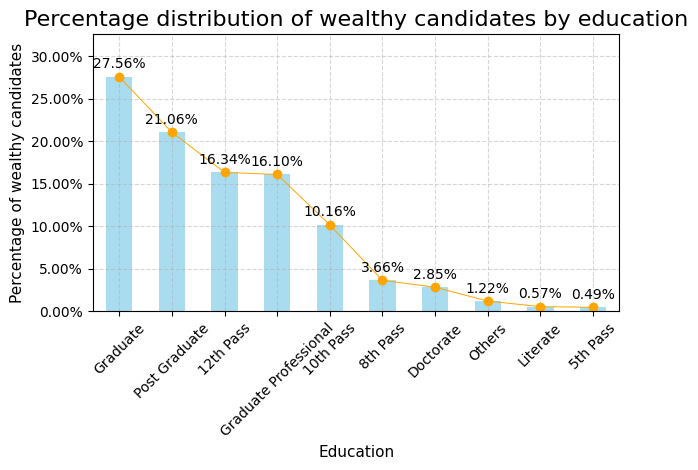

In [55]:
def convert_to_numeric(value):
    if isinstance(value, float):
        return value
    elif value == '0':
        return 0.0
    elif 'Crore' in value:
        return float(value.replace(' Crore+', '')) * 10**7
    elif 'Lac' in value:
        return float(value.replace(' Lac+', '')) * 10**5
    elif 'Thou' in value:
        return float(value.replace(' Thou+', '')) * 10**3

data = pd.read_csv('train.csv')

data['Total Assets'] = data['Total Assets'].apply(convert_to_numeric)
data['Liabilities'] = data['Liabilities'].apply(convert_to_numeric)
data['Liabilities'].fillna(0, inplace=True)

def calculate_net_worth(row):
    assets = row['Total Assets']
    liabilities = row['Liabilities']
    return assets - liabilities

data['Net Worth'] = data.apply(calculate_net_worth, axis=1)

wealthy_candidates = data[data['Net Worth'] > 10000000]

wealthy_by_education = wealthy_candidates.groupby('Education').size().reset_index(name='Count')

total_wealthy_candidates = wealthy_by_education['Count'].sum()

wealthy_by_education['Percentage'] = (wealthy_by_education['Count'] / total_wealthy_candidates) * 100

wealthy_by_education_sorted = wealthy_by_education.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(12, 8))

wealthy_by_education_sorted.plot(kind='bar', x='Education', y='Percentage', color='skyblue', alpha=0.7, legend=None)

numeric_index = range(len(wealthy_by_education_sorted))
line_plot = plt.plot(numeric_index, wealthy_by_education_sorted['Percentage'], marker='o', color='orange', linewidth=0.7)

plt.title('Percentage distribution of wealthy candidates by education', fontsize=16)
plt.xlabel('Education', fontsize=11)
plt.ylabel('Percentage of wealthy candidates', fontsize=11)
plt.xticks(numeric_index, wealthy_by_education_sorted['Education'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in range(0, 31, 5)])
plt.ylim(0, max(wealthy_by_education_sorted['Percentage']) + 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

for i, value in enumerate(wealthy_by_education_sorted['Percentage']):
    plt.text(i, value + 1, '{:.2f}%'.format(value), ha='center', fontsize=10)

plt.show()

/var/folders/gw/hccx75pd68gbqqzt5nz321pw0000gn/T/ipykernel_46864/3842768286.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in range(0, 31, 5)])


<Figure size 1200x800 with 0 Axes>

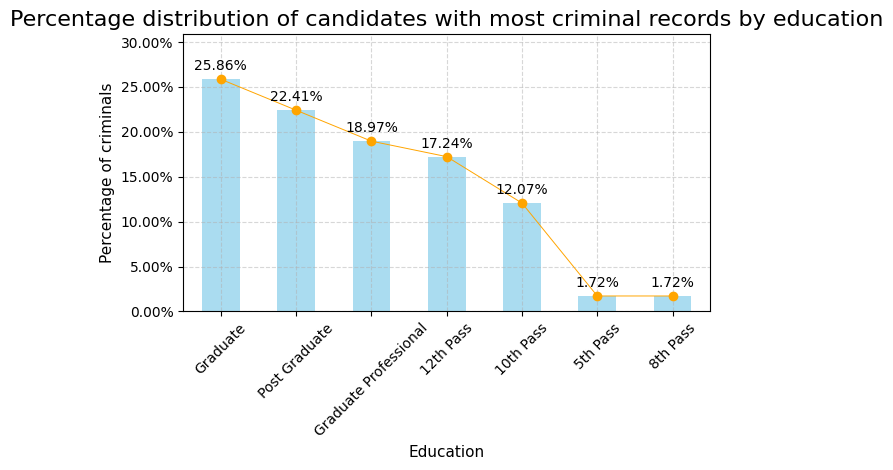

In [57]:
criminal_candidates = data[data['Criminal Case'] > 10]

criminal_by_education = criminal_candidates.groupby('Education').size().reset_index(name='Count')

total_criminal_candidates = criminal_by_education['Count'].sum()

criminal_by_education['Percentage'] = (criminal_by_education['Count'] / total_criminal_candidates) * 100

criminal_by_education_sorted = criminal_by_education.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(12, 8))

criminal_by_education_sorted.plot(kind='bar', x='Education', y='Percentage', color='skyblue', alpha=0.7, legend=None)

numeric_index = range(len(criminal_by_education_sorted))
line_plot = plt.plot(numeric_index, criminal_by_education_sorted['Percentage'], marker='o', color='orange', linewidth=0.7)

plt.title('Percentage distribution of candidates with most criminal records by education', fontsize=16)
plt.xlabel('Education', fontsize=11)
plt.ylabel('Percentage of criminals', fontsize=11)

plt.xticks(numeric_index, criminal_by_education_sorted['Education'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in range(0, 31, 5)])
plt.ylim(0, max(criminal_by_education_sorted['Percentage']) + 5)

plt.grid(True, linestyle='--', alpha=0.5)
for i, value in enumerate(criminal_by_education_sorted['Percentage']):
    plt.text(i, value + 1, '{:.2f}%'.format(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

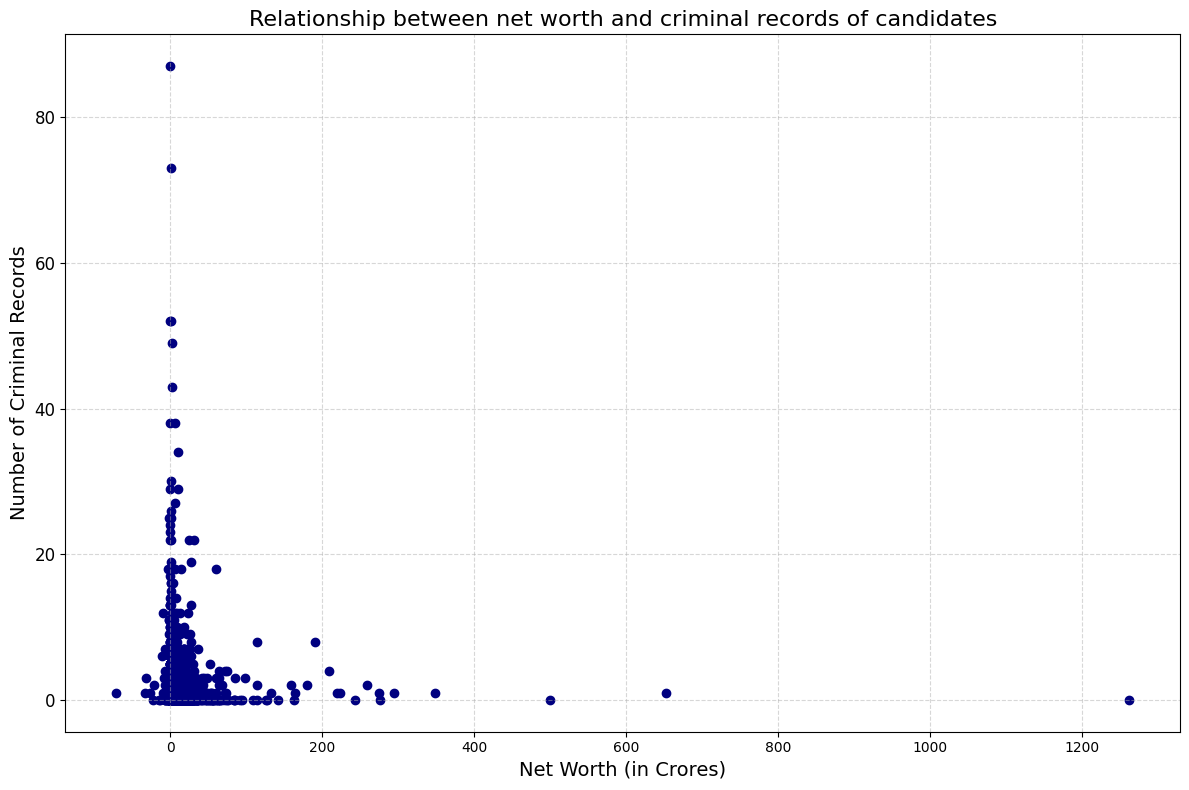

In [58]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))

plt.scatter(data['Net Worth'], data['Criminal Case'], color='navy', alpha=1)

plt.title('Relationship between net worth and criminal records of candidates', fontsize=16)
plt.xlabel('Net Worth (in Crores)', fontsize=14)
plt.ylabel('Number of Criminal Records', fontsize=14)

plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x / 1e7))
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()
